# Tarea 4
# Yasuo Ignacio Maidana Perez A01328427

## ¿Cuáles son las ventajas y desventajas de utilizar el descenso de gradiente estocástico en comparación al descenso de gradiente?
La ventaja radica en que se disminuye el poder de computo por cada iteracion ya que en lugar de trabajar con todos los datos, se escogen una cantidad al azar por iteracion y en base a ella es que se hacen los calculos necesarios.
Si bien, este metodo podria funcionar muy bien, al elegirse al azar dependiendo de la distribuicion de los datos se podria hacer una regresion incorrecta, ademas que lo vuelve muy susceptible al ruido de los datos
## ¿Cuáles son las ventajas y desventajas de utilizar validación cruzada sobre una validación con el proceso de hold out?
La ventaja radica en que se utilizan todos los datos para validar y entrenar. La desventaja es que ahora el algoritmo se tarda mas en procesar toda la informacion

In [1]:
#Ejercicio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn import preprocessing ya no lo supe usar, tambien queria usar cross validation

data = pd.read_csv('kc_house_data.csv') #Carga datos
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [2]:
#Cargar datos para trabajar
area=data['sqft_living']#Carga area
precio=data['price']#Carga precio

#import time
#from IPython import display

#for i in area:
    #Used to show in iterations
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    #time.sleep(0.0000000001)


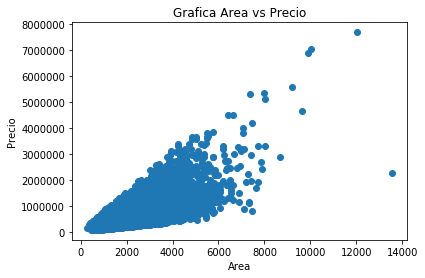

In [3]:
#Mostrar datos
plt.xlabel('Area')
plt.ylabel('Precio')
plt.title('Grafica Area vs Precio')
plt.scatter(area,precio)
plt.show()

In [4]:
#Asignacion del 80% para entrenamiento y 20 para testeo
import math
toTest=math.trunc(len(area)*.8)
X_Train=area[:toTest].to_numpy().reshape(-1, 1) #Tiene que ser de tipo numpy y para arreglos de 1 dato
X_Test=area[toTest:].to_numpy().reshape(-1, 1)
Y_Train=precio[:toTest].to_numpy().reshape(-1, 1)
Y_Test=precio[toTest:].to_numpy().reshape(-1, 1)

#X_Train=X_Train.to_numpy()
#X_Train=[(i)for i in X_Train]


In [5]:
regr = linear_model.LinearRegression() #Crear objeto para regresion

In [6]:
# Entrenamiento del modelo
regr.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Realizar la validacion
Y_Testada = regr.predict(X_Test)

In [8]:
#Mostrar datos
print('Los coeficientes son: \n', regr.coef_)
# The mean squared error
print('El error cuadrado promedio es: %.2f'
      % mean_squared_error(Y_Test, Y_Testada))
# The coefficient of determination: 1 is perfect prediction
print('El coeficiente de varianza (r^2) es : %.2f'
      % r2_score(Y_Test, Y_Testada))

Los coeficientes son: 
 [[283.8842254]]
El error cuadrado promedio es: 69699588151.65
El coeficiente de varianza (r^2) es : 0.49


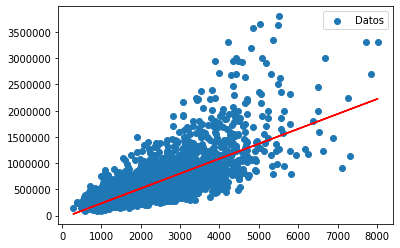

In [55]:
a=plt.scatter(X_Test, Y_Test)
b=plt.plot(X_Test, Y_Testada,color='red')

plt.legend((a,b),(["Datos"])) #Intente ponerle label a la linea pero no salio
plt.show()

In [28]:
c=np.array([900]).reshape(-1,1)
pC = regr.predict(c)
#print(round(pC[0][0])
print('El precio calculado para un sqft_living es $',round(pC[0][0]))

El precio calculado para un sqft_living es $ 205635.0
